In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Setting paths and showing the number of images
infected = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized")
infected_path = "../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized"
print("Length of infected data = ", len(infected), 'images')
uninfected = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected")
uninfected_path = "../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected"
print("Length of uninfected data = ", len(uninfected), 'images')

Length of infected data =  13780 images
Length of uninfected data =  13780 images


In [3]:
from glob import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
import os
from tensorflow.keras import layers 
from tensorflow.keras import Model

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams['figure.figsize'] = (12,7)

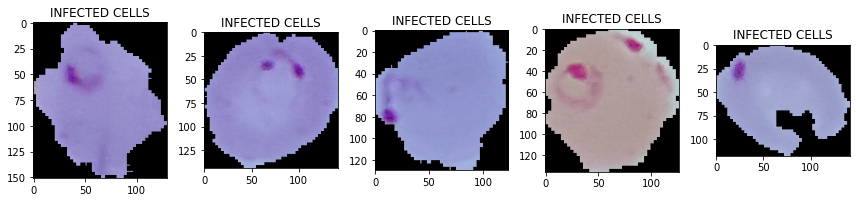

In [4]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(infected_path + '/' + infected[i]))
    plt.title('INFECTED CELLS')
    plt.tight_layout()
plt.show()

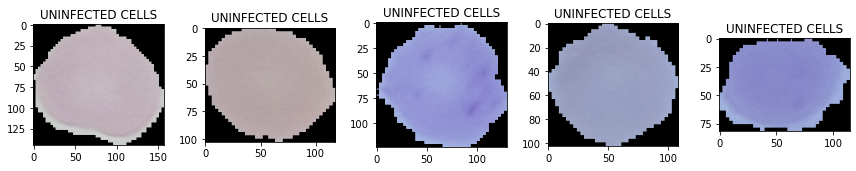

In [5]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(uninfected_path + '/' + uninfected[i]))
    plt.title('UNINFECTED CELLS')
    plt.tight_layout()
plt.show()

In [6]:
img_shape = (64, 64, 3)
image_gen = ImageDataGenerator(rotation_range=45,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.1,
                               vertical_flip=True,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [7]:
train_generator = image_gen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'training',
                                     shuffle = True,
                                     classes=['Uninfected', 'Parasitized'])

validation_generator = image_gen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'validation',
                                     shuffle = False,
                                     classes=['Uninfected', 'Parasitized'])

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Uninfected': 0, 'Parasitized': 1}
{'Uninfected': 0, 'Parasitized': 1}


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [10]:
#classifier = Sequential()

In [11]:
#classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [12]:
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [13]:
#classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
#classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [15]:
#classifier.add(Flatten())

In [16]:
#classifier.add(Dense(units = 128, activation = 'relu'))
#classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [17]:
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
#classifier.fit_generator(train,
#steps_per_epoch = 5000,
#epochs = 10,
#validation_data = validation,
#validation_steps = 2000)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [22]:
# set early stopping, to avoid overtraining

early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [23]:
history = model.fit_generator(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=[early_stop]
        )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
689/689 [==============================] - 222s 317ms/step - loss: 0.7277 - acc: 0.7000 - val_loss: 0.2696 - val_acc: 0.9140
Epoch 2/50
689/689 [==============================] - 69s 101ms/step - loss: 0.1956 - acc: 0.9359 - val_loss: 0.2268 - val_acc: 0.9260
Epoch 3/50
689/689 [==============================] - 69s 100ms/step - loss: 0.1812 - acc: 0.9403 - val_loss: 0.2006 - val_acc: 0.9363
Epoch 4/50
689/689 [==============================] - 69s 101ms/step - loss: 0.1689 - acc: 0.9444 - val_loss: 0.2035 - val_acc: 0.9201
Epoch 5/50
689/689 [==============================] - 69s 100ms/step - loss: 0.1654 - acc: 0.9445 - val_loss: 0.1742 - val_acc: 0.9416
Epoch 6/50
689/689 [==============================] - 69s 100ms/step - loss: 0.1667 - acc: 0.9465 - val_loss: 0.1486 - val_acc: 0.9456
Epoch 7/50
689/689 [==============================] - 70s 101ms/step - loss: 0.1642 - acc: 0.9453 - val_loss: 0.2061 - val_acc: 0.9390
Epoch 8/50
689/689 [==============================] - 

In [24]:
model.evaluate(validation_generator)

173/173 [==============================] - 14s 79ms/step - loss: 0.1490 - acc: 0.9479


[0.14900605380535126, 0.947912871837616]

In [25]:
pred_probabilities = model.predict(validation_generator)

In [26]:
predictions = pred_probabilities > 0.5

In [27]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [28]:
print(classification_report(validation_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2755
           1       0.98      0.92      0.95      2755

    accuracy                           0.95      5510
   macro avg       0.95      0.95      0.95      5510
weighted avg       0.95      0.95      0.95      5510



In [29]:
confusion_matrix = pd.DataFrame(confusion_matrix(validation_generator.classes, predictions))
confusion_matrix

,0,1
0,2694,61
1,212,2543


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

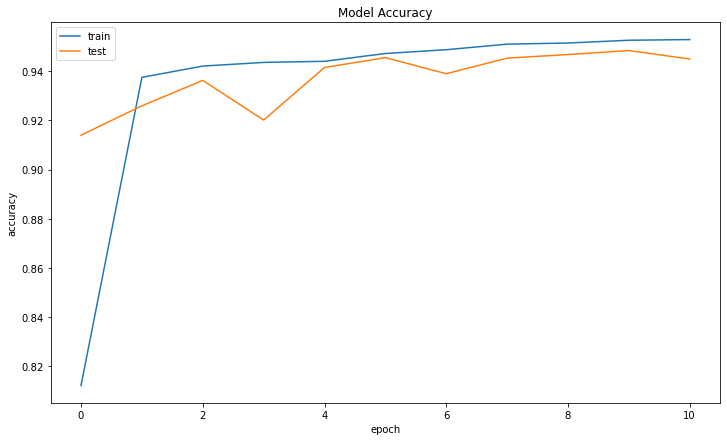

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

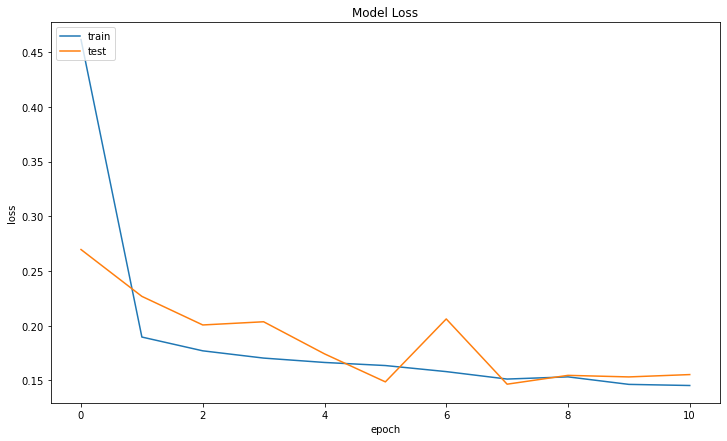

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
test_ = image_gen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                        target_size = img_shape[:2],
                                        color_mode = 'rgb',
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='validation',
                                        shuffle = True
                                     )

Found 5510 images belonging to 2 classes.


In [34]:
model.evaluate_generator(test_, verbose=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


173/173 [==============================] - 14s 80ms/step - loss: 4.3758 - acc: 0.0548


[4.375827312469482, 0.054809436202049255]

In [35]:
model.save('malaria_detection.h5')